In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [4]:
df['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [4]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# # Encode categorical variables
# label_encoder = LabelEncoder()
# df['gender'] = label_encoder.fit_transform(df['gender'])
# df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

# # Define features and target
# X = df.drop('diabetes', axis=1)
# y = df['diabetes']

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a RandomForestClassifier model
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# # Predict on the test set
# y_pred = model.predict(X_test)

# # Calculate the accuracy score
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy * 100:.2f}%')

In [5]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.metrics import accuracy_score
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# # Encode categorical variables
# label_encoder = LabelEncoder()
# df['gender'] = label_encoder.fit_transform(df['gender'])
# df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

# # Define features and target
# X = df.drop('diabetes', axis=1)
# y = df['diabetes']

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Create a deep learning model
# model = Sequential()
# model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=5, batch_size=10, verbose=1)

# # Predict on the test set
# y_pred = model.predict(X_test)
# y_pred = (y_pred > 0.5).astype(int)

# # Calculate the accuracy score
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy * 100:.2f}%')

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# from imblearn.over_sampling import SMOTE
import joblib

# Encode categorical variables
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

# Define features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a deep learning model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=10, verbose=1)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Save the model
model.save('diabetes_model.h5')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


Epoch 1/5
8000/8000 [==============================] - 17s 2ms/step - loss: 0.1117 - accuracy: 0.9622
Epoch 2/5
8000/8000 [==============================] - 17s 2ms/step - loss: 0.0910 - accuracy: 0.9691
Epoch 3/5
8000/8000 [==============================] - 18s 2ms/step - loss: 0.0864 - accuracy: 0.9705
Epoch 4/5
8000/8000 [==============================] - 20s 2ms/step - loss: 0.0848 - accuracy: 0.9708
Epoch 5/5
625/625 [==============================] - 1s 2ms/step
Accuracy: 97.14%


['scaler.pkl']

In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
df.dtypes

gender                   int32
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int32
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [9]:
df['gender'].value_counts()

0    58552
1    41430
2       18
Name: gender, dtype: int64

In [10]:
df['smoking_history'].value_counts()

0    35816
4    35095
3     9352
1     9286
5     6447
2     4004
Name: smoking_history, dtype: int64

In [11]:
df['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [9]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [11]:
df = df.drop_duplicates()

In [13]:
df.shape

(96146, 9)

ValueError: cannot convert float NaN to integer

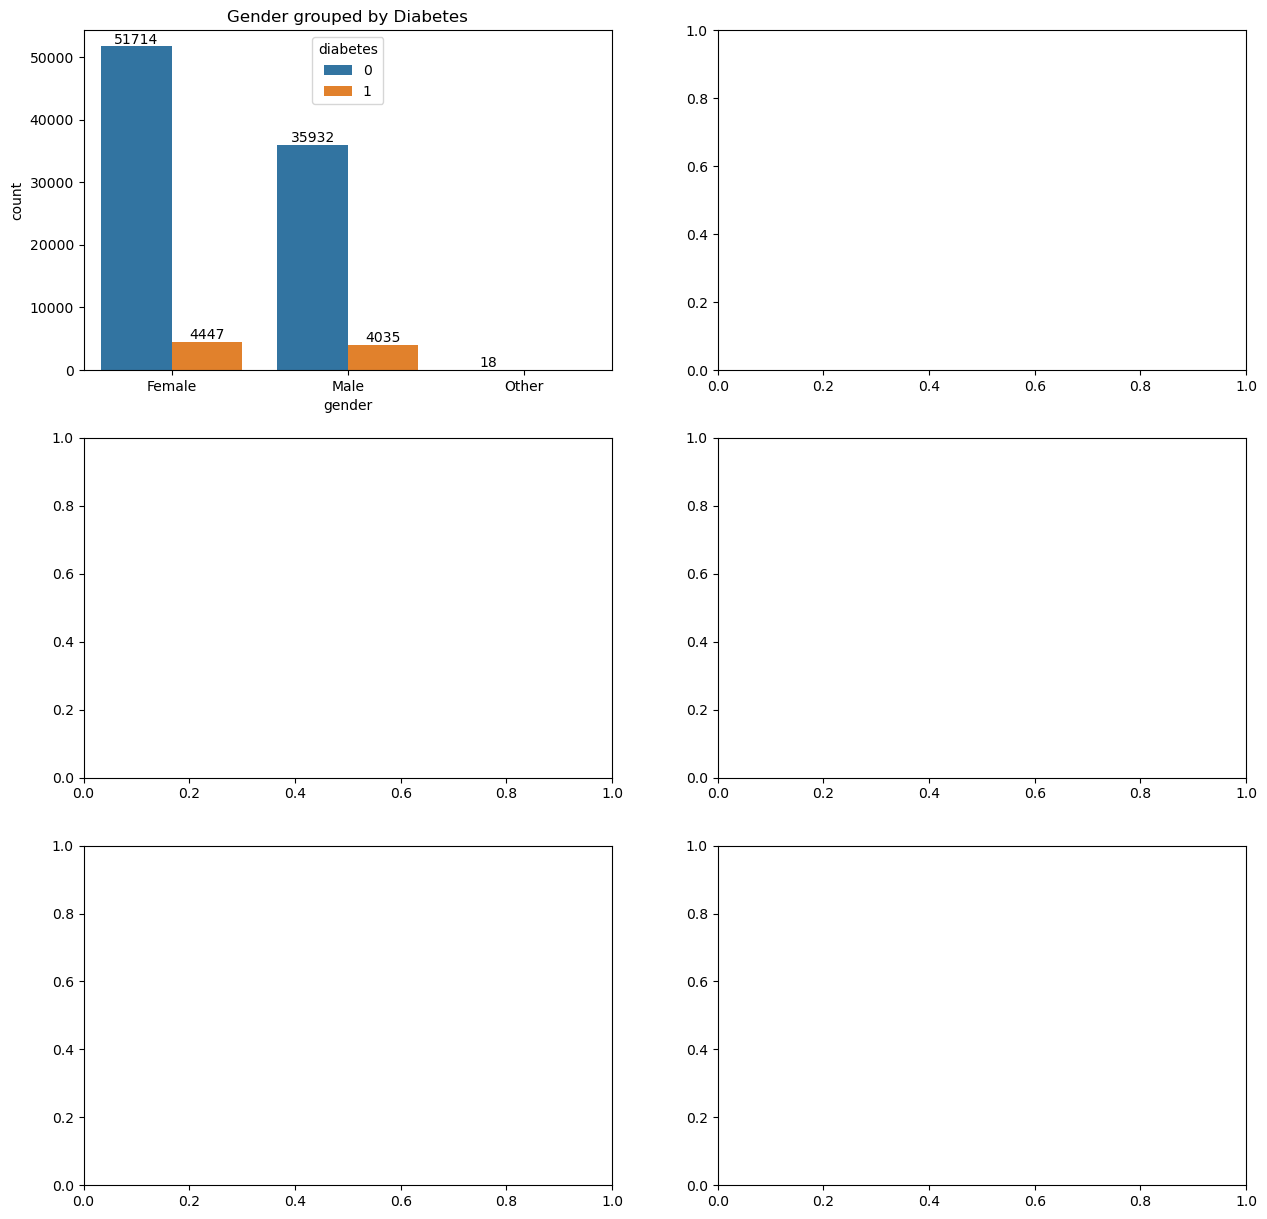

In [16]:
def add_counts(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot gender grouped by diabetes
ax = sns.countplot(ax=axes[0, 0], x='gender', hue='diabetes', data=df)
axes[0, 0].set_title('Gender grouped by Diabetes')
add_counts(ax)

# Plot hypertension grouped by diabetes
ax = sns.countplot(ax=axes[0, 1], x='hypertension', hue='diabetes', data=df)
axes[0, 1].set_title('Hypertension grouped by Diabetes')
add_counts(ax)

# Plot heart disease grouped by diabetes
ax = sns.countplot(ax=axes[1, 0], x='heart_disease', hue='diabetes', data=df)
axes[1, 0].set_title('Heart Disease grouped by Diabetes')
add_counts(ax)

# Plot smoking history grouped by diabetes
ax = sns.countplot(ax=axes[1, 1], x='smoking_history', hue='diabetes', data=df)
axes[1, 1].set_title('Smoking History grouped by Diabetes')
add_counts(ax)

# Plot diabetes
ax = sns.countplot(ax=axes[2, 0], x='diabetes', data=df)
axes[2, 0].set_title('Diabetes Count')
add_counts(ax)

# Create pie plot for diabetes
diabetes_counts = df['diabetes'].value_counts()
axes[2, 1].pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90)
axes[2, 1].set_title('Diabetes Distribution')
axes[2, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[2, 1].legend(title='Diabetes:', loc='upper right')
# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

Minimum age: 0.08
Maximum age: 80.0
Average age: 41.79432571297831
Diabetes Counts:
0    87664
1     8482
Name: diabetes, dtype: int64
Age Statistics by Diabetes Status:
           min   max
diabetes            
0         0.08  80.0
1         3.00  80.0


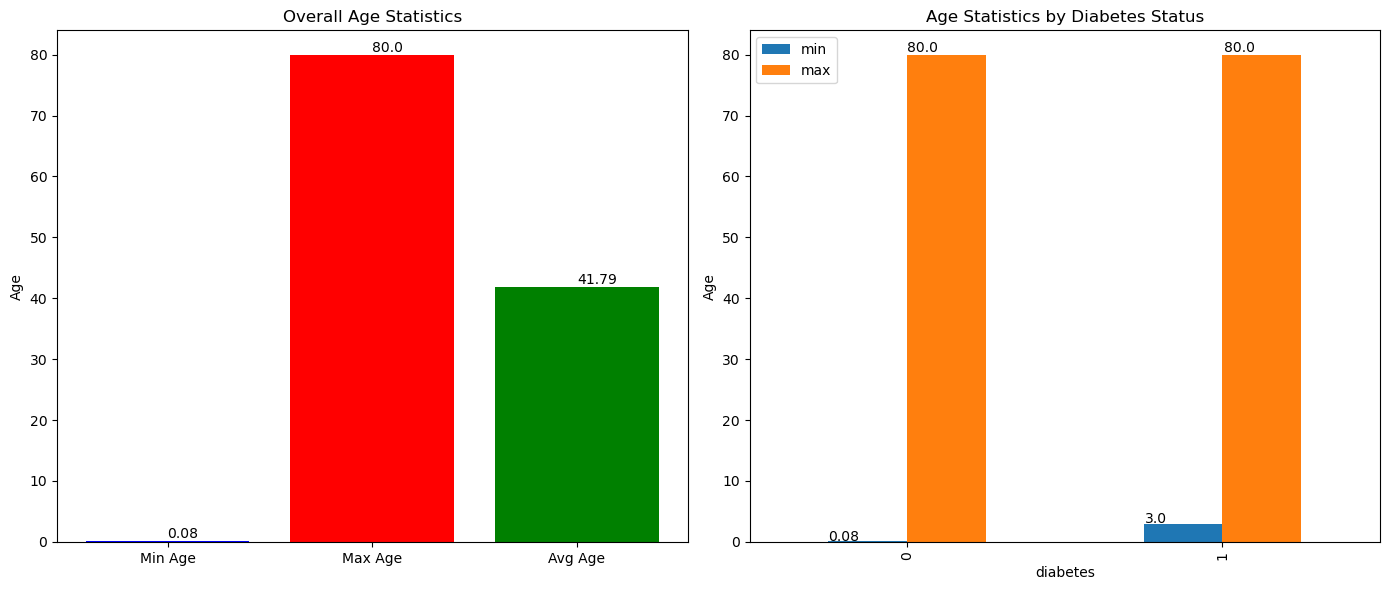

In [17]:
# Calculate minimum, maximum, and average age
min_age = df['age'].min()
max_age = df['age'].max()
avg_age = df['age'].mean()

# Count of individuals with and without diabetes
diabetes_counts = df['diabetes'].value_counts()

# Group by diabetes status and calculate min and max ages
grouped_ages = df.groupby('diabetes')['age'].agg(['min', 'max'])

# Print the results
print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")
print(f"Average age: {avg_age}")
print("Diabetes Counts:")
print(diabetes_counts)
print("Age Statistics by Diabetes Status:")
print(grouped_ages)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for overall min, max, and average age
bars = ax[0].bar(['Min Age', 'Max Age', 'Avg Age'], [min_age, max_age, avg_age], color=['blue', 'red', 'green'])
ax[0].set_title('Overall Age Statistics')
ax[0].set_ylabel('Age')

# Annotate bars with their values
for bar in bars:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # Add text to the top of the bars

# Plot for min and max ages grouped by diabetes status
grouped_bars = grouped_ages.plot(kind='bar', ax=ax[1])
ax[1].set_title('Age Statistics by Diabetes Status')
ax[1].set_ylabel('Age')

# Annotate bars with their values
for p in grouped_bars.patches:
    grouped_bars.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.tight_layout()
plt.show()

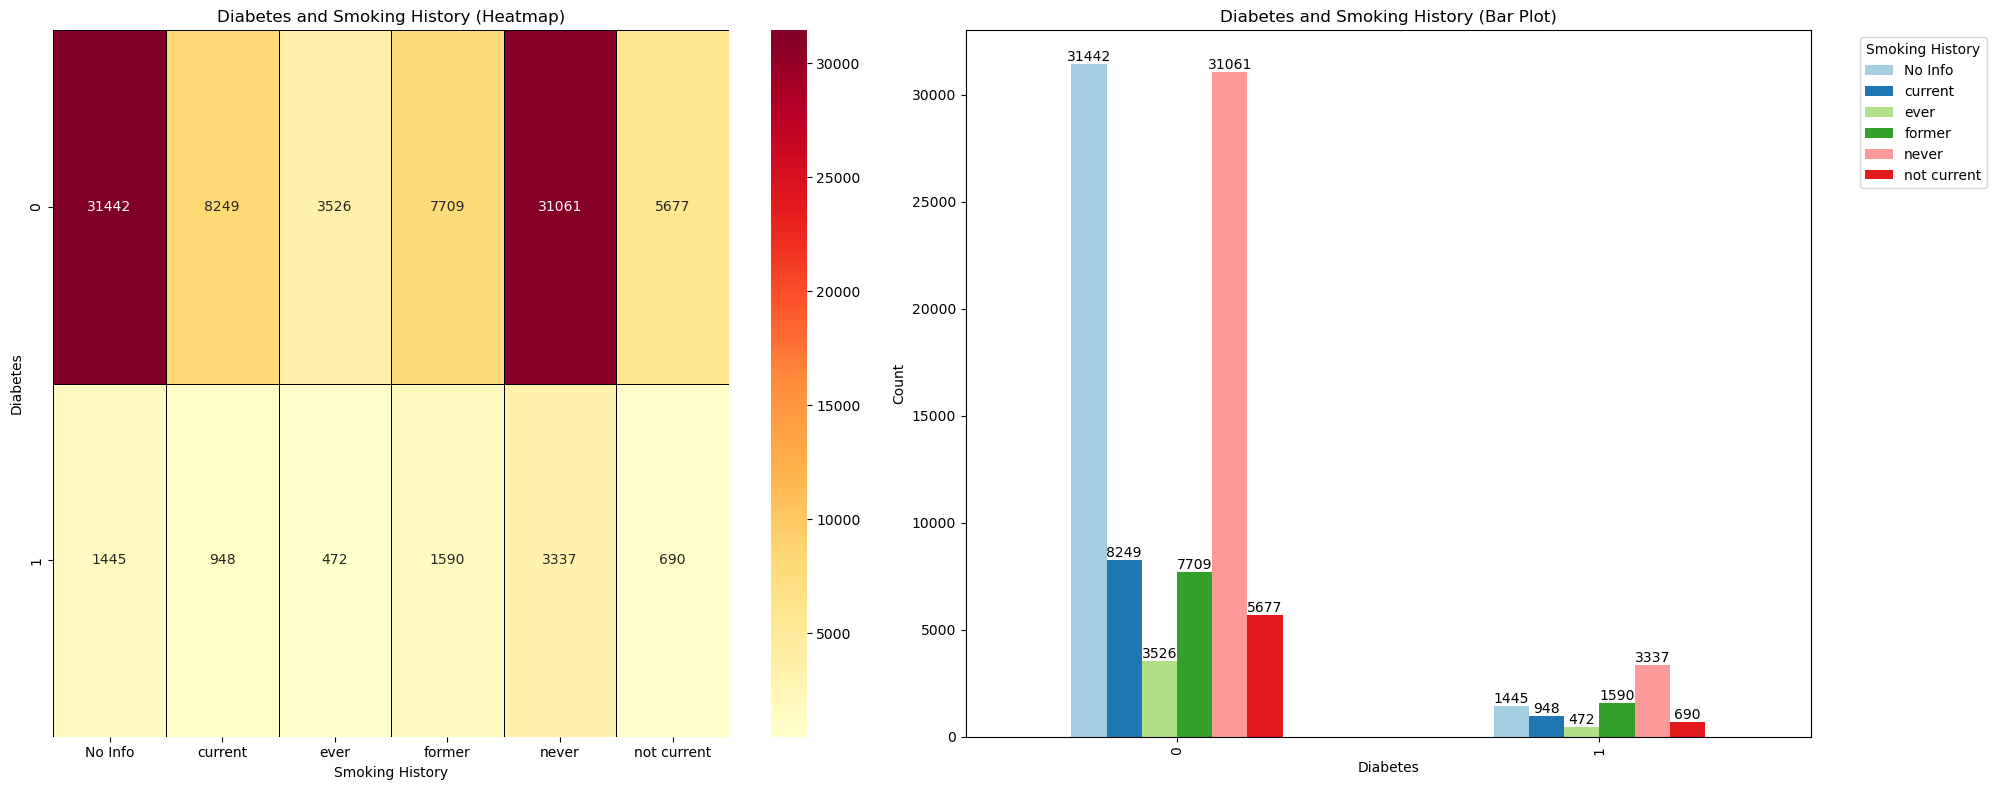

In [18]:
cross_table = pd.crosstab(df['diabetes'], df['smoking_history'])

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the cross table as a heatmap
sns.heatmap(cross_table, cmap='YlOrRd', annot=True, fmt='d', linewidths=0.5, linecolor='black', ax=ax[0])
ax[0].set_title('Diabetes and Smoking History (Heatmap)')
ax[0].set_xlabel('Smoking History')
ax[0].set_ylabel('Diabetes')

# Plotting the cross table with separate bars for smoking history
cross_table.plot(kind='bar', stacked=False, ax=ax[1], color=plt.cm.Paired.colors)
ax[1].set_title('Diabetes and Smoking History (Bar Plot)')
ax[1].set_xlabel('Diabetes')
ax[1].set_ylabel('Count')
ax[1].legend(title='Smoking History', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate bars with their values
for container in ax[1].containers:
    ax[1].bar_label(container)

plt.tight_layout()
plt.show()

In [19]:
# incode the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

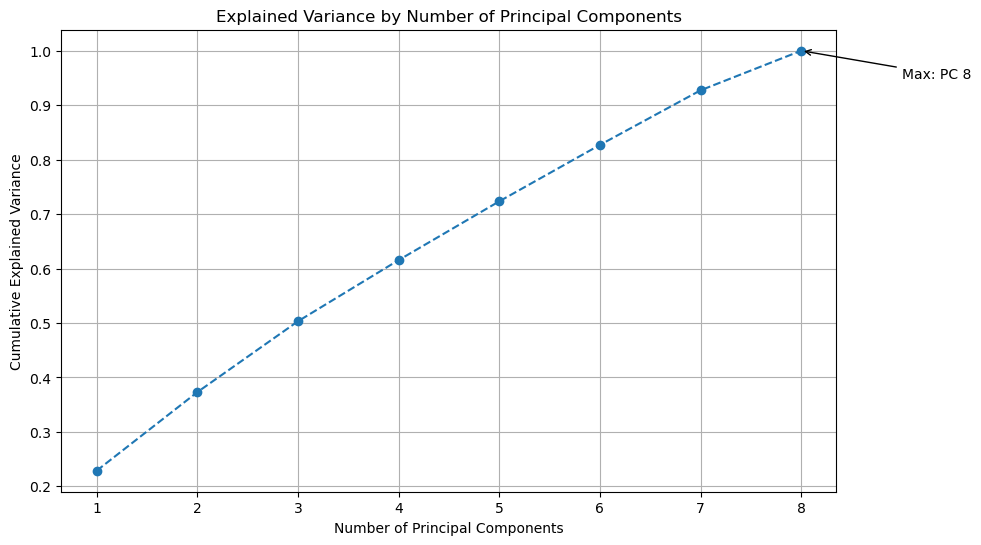

Principal Component 1: 0.2287 cumulative explained variance
Principal Component 2: 0.3729 cumulative explained variance
Principal Component 3: 0.5031 cumulative explained variance
Principal Component 4: 0.6154 cumulative explained variance
Principal Component 5: 0.7234 cumulative explained variance
Principal Component 6: 0.8270 cumulative explained variance
Principal Component 7: 0.9273 cumulative explained variance
Principal Component 8: 1.0000 cumulative explained variance


In [22]:
# Selecting features and target variable
features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X = df[features]
y = df['diabetes']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()

# Find the index of the maximum cumulative explained variance
max_index = pca.explained_variance_ratio_.cumsum().argmax()

# Annotate the point with the highest cumulative explained variance
plt.annotate(f'Max: PC {max_index + 1}',
             xy=(max_index + 1, pca.explained_variance_ratio_.cumsum()[max_index]),
             xytext=(max_index + 2, pca.explained_variance_ratio_.cumsum()[max_index] - 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->', color='black'))

plt.show()

# Printing explained variance ratios
for i, ratio in enumerate(pca.explained_variance_ratio_.cumsum()):
    print(f'Principal Component {i+1}: {ratio:.4f} cumulative explained variance')

# Choose the number of components that explain most of the variance
n_components = max_index + 1

# Applying PCA with the optimal number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [23]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initializing and training the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Making predictions
y_pred = xgb_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Accuracy: {accuracy:.4f}')
print(f'XGBoost Classification Report:\n{classification_report(y_test, y_pred)}')

XGBoost Accuracy: 0.9664
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.94      0.67      0.78      1721

    accuracy                           0.97     19230
   macro avg       0.95      0.83      0.88     19230
weighted avg       0.97      0.97      0.96     19230



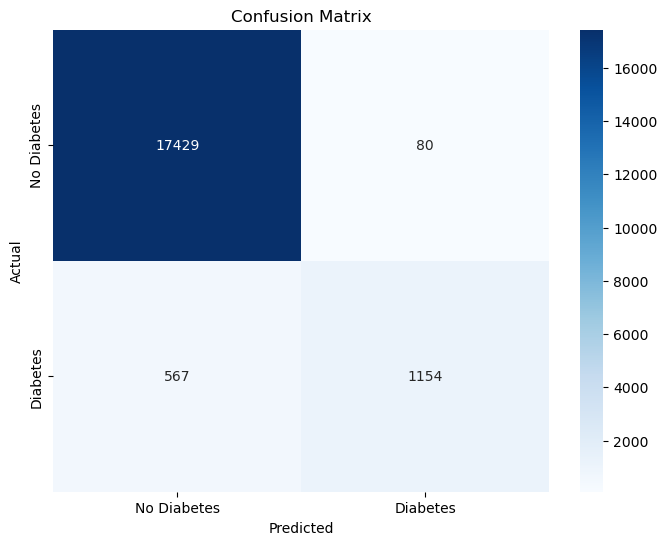

In [24]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
# Prepare custom data
custom_data = [
    [1, 45, 0, 0, 1, 25.6, 6.5, 110],
    [0, 35, 1, 0, 0, 28.2, 7.2, 130],
    [1, 55, 1, 1, 1, 31.4, 8.0, 150],
    [0, 42, 0, 1, 0, 26.9, 7.0, 120],
    [1, 50, 1, 0, 1, 29.7, 7.8, 140]
]

# Convert to pandas DataFrame
custom_df = pd.DataFrame(custom_data, columns=features)

# Standardize the custom data
custom_X = scaler.transform(custom_df[features])

# Apply PCA transformation
custom_X_pca = pca.transform(custom_X)

# Make predictions using the trained XGBoost model
custom_predictions = xgb_model.predict(custom_X_pca)

# Print the predictions
for i, pred in enumerate(custom_predictions):
    if pred == 0:
        print(f"Person {i+1} is not predicted to have diabetes.")
    else:
        print(f"Person {i+1} is predicted to have diabetes.")

Person 1 is not predicted to have diabetes.
Person 2 is predicted to have diabetes.
Person 3 is predicted to have diabetes.
Person 4 is not predicted to have diabetes.
Person 5 is predicted to have diabetes.
